First, we need to import the libraries needed to have access to functions.py and various other libraries

In [246]:
import sys
import os

We append our to working path the ../src path, where functions.py lies

In [247]:

# need to be able to import src
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

# absolute path to the src directory
src_path = os.path.abspath("../src")

# Add src directory to system path
sys.path.append(src_path)

# get the /MLCBAss1/Assignment-2 path
ass_path=sys.path[-2]

print(ass_path)

/home/sdi1700187/MLCBAss2/Assignment-2


We import everything from functions.py. Also the first two line ensure that everytime we change something to functions.py, this change can be "seen" here

In [248]:
%load_ext autoreload
%autoreload 2

from functions import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [249]:
df=pd.read_csv('../data/breast_cancer.csv')
print(df.head())
df=clean_data(df)
print(df.head())

   id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0   1         M        14.68         20.13           94.74      684.5   
1   2         B        11.50         18.45           73.28      407.4   
2   3         M        15.85         23.95          103.70      782.7   
3   4         M        18.82         21.97          123.70     1110.0   
4   5         B        12.95         16.02           83.14      513.7   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.09867           0.07200         0.07395              0.05259   
1          0.09345           0.05991         0.02638              0.02069   
2          0.08401           0.10020         0.09938              0.05364   
3          0.10180           0.13890         0.15940              0.08744   
4          0.10050           0.07943         0.06155              0.03370   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         19.07          

Selected 15 out of 30


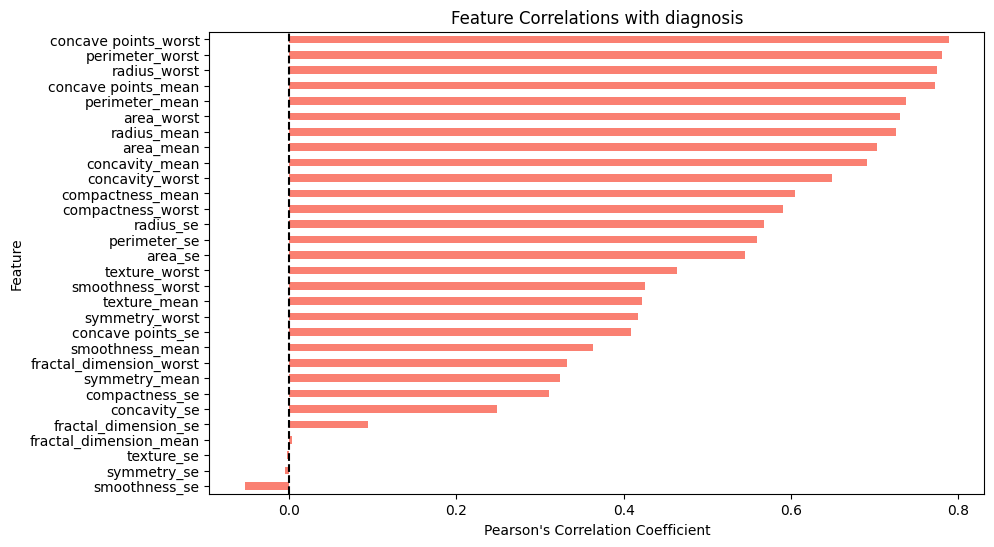

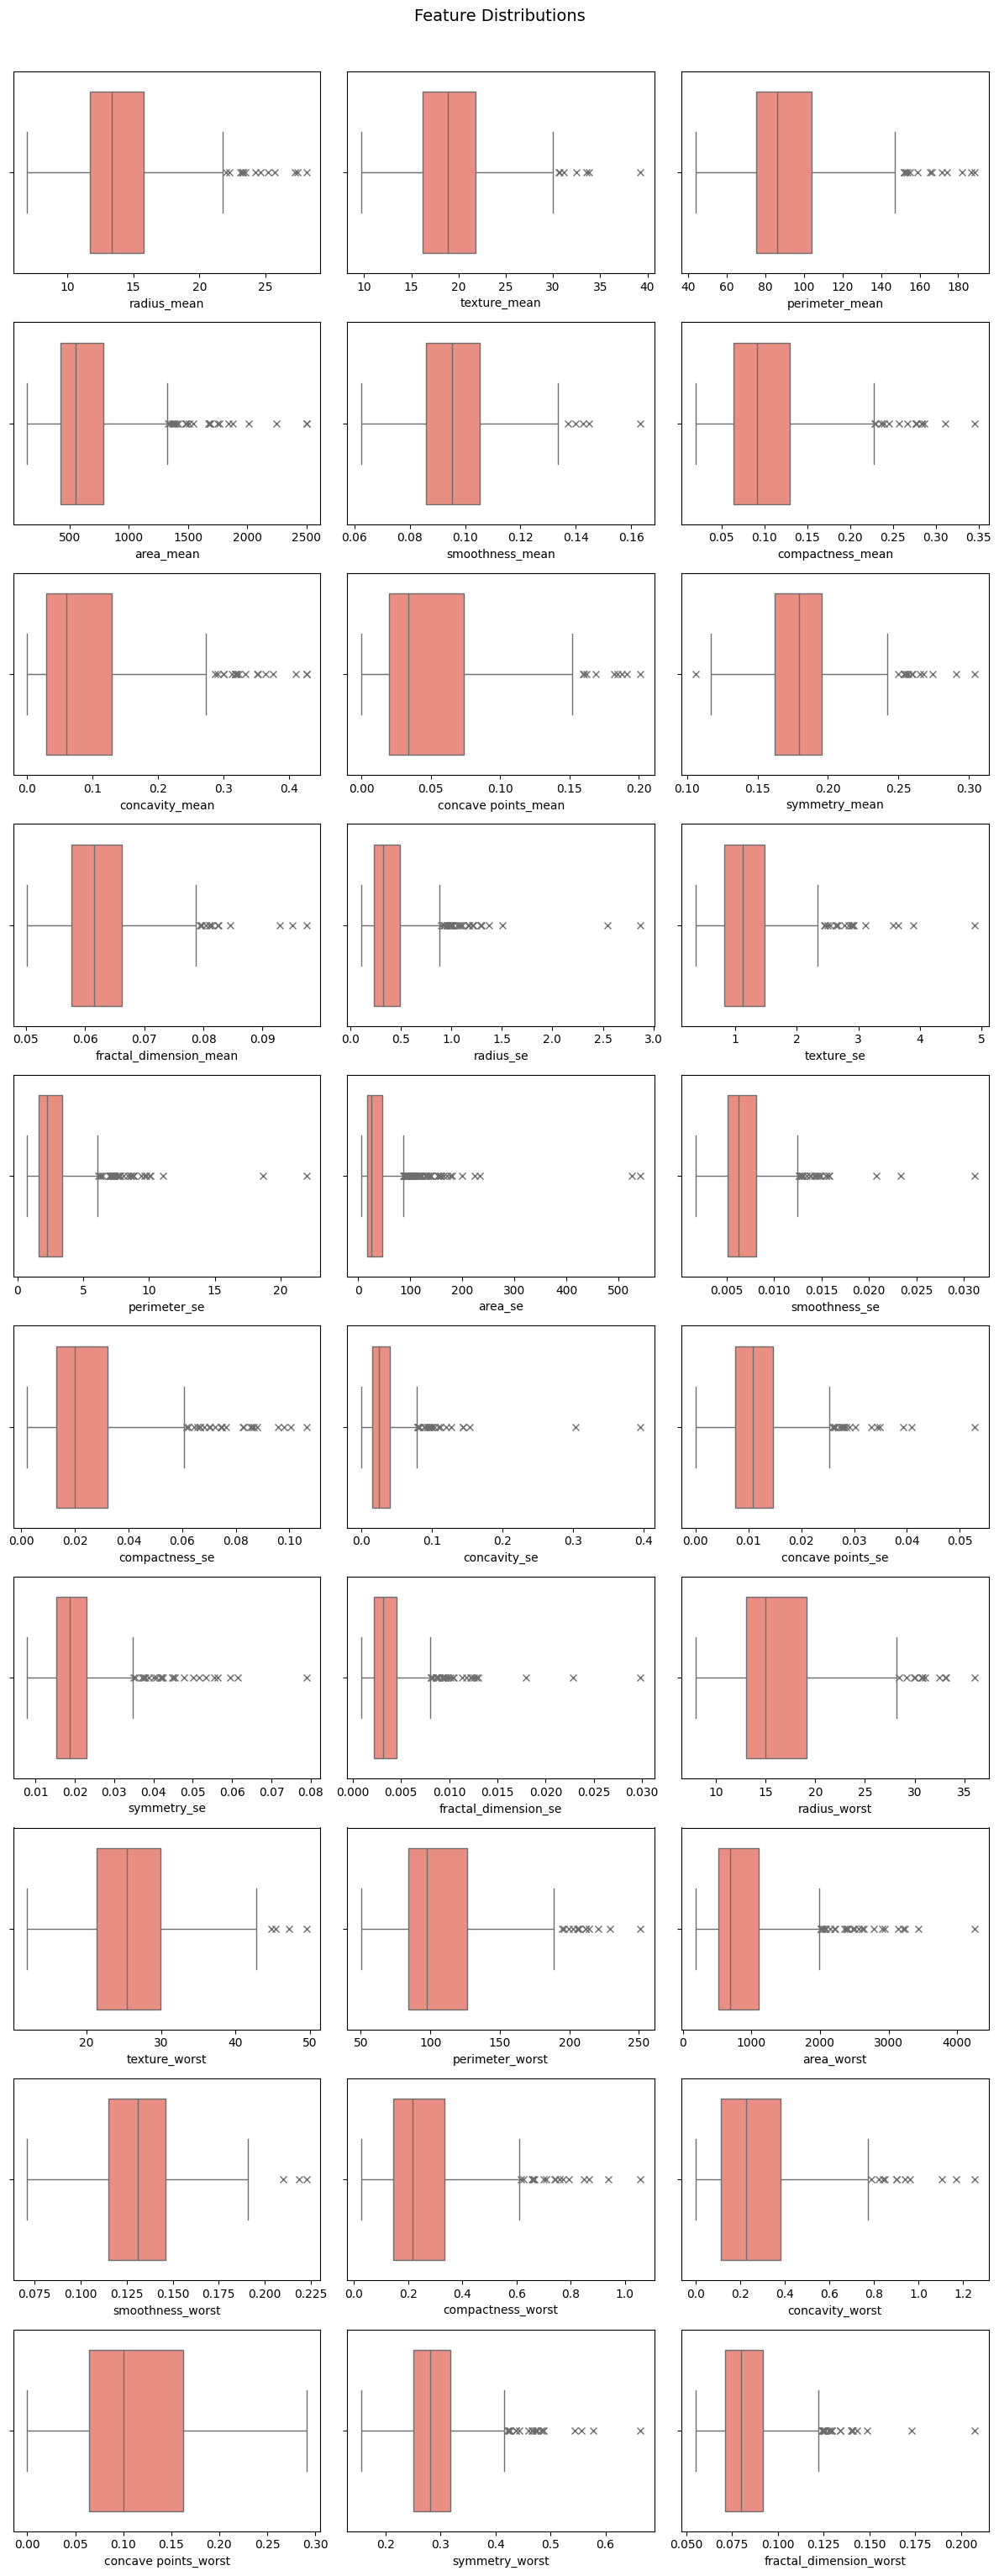

In [250]:
corr_between_target(data_df=df,thres=0.5)
boxpolt_distro(data_df=df)